In [1]:
import numpy as np
import pandas as pd
import sklearn
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import scipy
import re
import pickle
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
df_train = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')
df_sample_sub = pd.read_csv('data/sampleSubmission.csv')
df_bids = pd.read_csv('data/bids.csv')

In [20]:
df_bids

,bid_id,bidder_id,auction,merchandise,device,time,country,ip,url
0,0,8dac2b259fd1c6d1120e519fb1ac14fbqvax8,ewmzr,jewelry,phone0,9759243157894736,us,69.166.231.58,vasstdc27m7nks3
1,1,668d393e858e8126275433046bbd35c6tywop,aeqok,furniture,phone1,9759243157894736,in,50.201.125.84,jmqlhflrzwuay9c
2,2,aa5f360084278b35d746fa6af3a7a1a5ra3xe,wa00e,home goods,phone2,9759243157894736,py,112.54.208.157,vasstdc27m7nks3
3,3,3939ac3ef7d472a59a9c5f893dd3e39fh9ofi,jefix,jewelry,phone4,9759243157894736,in,18.99.175.133,vasstdc27m7nks3
4,4,8393c48eaf4b8fa96886edc7cf27b372dsibi,jefix,jewelry,phone5,9759243157894736,in,145.138.5.37,vasstdc27m7nks3
5,5,e8291466de91b0eb4e1515143c7f74dexy2yr,3vi4t,mobile,phone7,9759243157894736,ru,91.107.221.27,vasstdc27m7nks3
6,6,eef4c687daf977f64fc1d08675c44444raj3s,kjlzx,mobile,phone2,9759243210526315,th,152.235.155.159,j9nl1xmo6fqhcc6
7,7,ab056855c9ca9d36390feae1fa485883issyg,f5f6k,home goods,phone8,9759243210526315,id,3.210.112.183,hnt6hu93a3z1cpc
8,8,d600dc03b11e7d782e1e4dae091b084a1h5ch,h7jjx,home goods,phone9,9759243210526315,th,103.64.157.225,vasstdc27m7nks3
9,9,a58ace8b671a7531c88814bc86b2a34cf0crb,3zpkj,sporting goods,phone4,9759243210526315,za,123.28.123.226,vasstdc27m7nks3


In [3]:
total_bids = df_bids.groupby('bidder_id').count()['bid_id'].values.reshape(-1,1)

In [4]:
total_bids

array([[  1],
       [  2],
       [  1],
       ..., 
       [  1],
       [664],
       [  1]])

In [5]:
total_bids.shape

(6614, 1)

In [6]:
country = df_bids.groupby(['bidder_id','auction'])['country'].apply(lambda x: len(x.unique()))

382341


(array([  1.95560000e+04,   1.02700000e+03,   2.84000000e+02,
          7.70000000e+01,   2.50000000e+01,   1.30000000e+01,
          7.00000000e+00,   1.00000000e+00,   2.00000000e+00,
          2.00000000e+00]),
 array([   2. ,   18.6,   35.2,   51.8,   68.4,   85. ,  101.6,  118.2,
         134.8,  151.4,  168. ]),
 <a list of 10 Patch objects>)

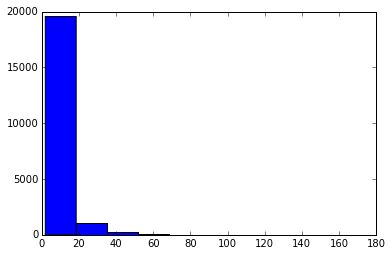

In [7]:
x = country.values
print len(x)
plt.hist(x[x>1])

In [8]:
c1 = df_bids.groupby(['bidder_id','auction'], as_index=False)['country'].aggregate(lambda x: len(x.unique()))

In [9]:
country.size

382341

In [10]:
df_bids.shape

(7656334, 9)

In [11]:
df_bids.groupby('bidder_id', as_index=False)['bidder_id']

In [12]:
c2 = c1.groupby('bidder_id')['country'].mean()

In [13]:
c2.values.shape

(6614,)

In [14]:
def get_bidder_stat(df, fun, f1, f2):
    c1 = df.groupby(['bidder_id',f1], as_index=False)[f2].aggregate(lambda x: len(x.unique()))
    c1[f2] = c1[f2].astype('float')
    c2 = c1.groupby('bidder_id')[f2].aggregate(lambda x: fun(x) if x.size>0 else 0)
    return c2.values.reshape(-1,1)

In [15]:
def get_bidder_stat2(df, fun, f1, f2):
    c1 = df.groupby(['bidder_id',f1], as_index=False)[f2].aggregate(lambda x: len(x.unique()))
    c1[f2] = c1[f2].astype('float')
    c2 = c1.groupby('bidder_id')[f2].mean()
    return c2.values.reshape(-1,1)

In [16]:
def get_bidder_stat3(df, fun, f1, f2):
    c1 = df.groupby(['bidder_id',f1], as_index=False)[f2].aggregate(lambda x: len(x.unique()))
    c2 = c1.groupby('bidder_id')[f2].mean()
    return c2.values.reshape(-1,1)

In [444]:
c_a_mean = get_bidder_stat3(df_bids, np.mean, 'auction', 'country')

In [445]:
c_a_std = get_bidder_stat(df_bids, np.std, 'auction', 'country')

In [446]:
np.sum(np.isnan(c_a_std)), c_a_std.shape[0]

(0, 6614)

In [447]:
d_a_mean = get_bidder_stat3(df_bids, np.mean, 'auction', 'device')

In [448]:
d_a_std = get_bidder_stat(df_bids, np.std, 'auction', 'device')

In [449]:
i_a_mean = get_bidder_stat3(df_bids, np.mean, 'auction', 'ip')

In [450]:
i_a_std = get_bidder_stat(df_bids, np.std, 'auction', 'ip')

In [451]:
u_a_mean = get_bidder_stat3(df_bids, np.mean, 'auction', 'url')

In [452]:
u_a_std = get_bidder_stat(df_bids, np.std, 'auction', 'url')

In [17]:
def get_bidder_stat_miss(df, fun, f1, f2):
    c1 = df.groupby(['bidder_id',f1], as_index=False)[f2].aggregate(lambda x: len(x.unique()))
    # create missing df
    ids_missing = set(df['bidder_id'])-set(c1['bidder_id'])
    len_missing = len(ids_missing)
    ids_a = np.array(list(ids_missing)).reshape(-1,1)
    empty_str_a = np.array(['' for i in range(len_missing)]).reshape(-1,1)
    missing_a = np.hstack([ids_a, empty_str_a, np.zeros((len_missing,1))])
    df_missing = pd.DataFrame(missing_a, columns=['bidder_id', f1, f2])
    # concat
    new_df = pd.concat([pd.DataFrame(c1), df_missing], ignore_index=True)
    new_df[f2] = new_df[f2].astype('float') # because pandas is fucky
    # new_df acts as c1
    c2 = new_df.groupby('bidder_id')[f2].aggregate(lambda x: fun(x) if x.size>0 else 0)
    return c2.values.reshape(-1,1)

In [19]:
# test

get_bidder_stat_miss(df_bids, np.std, 'url', 'ip')




array([[ 0.        ],
       [ 0.        ],
       [ 0.        ],
       ..., 
       [ 0.        ],
       [ 3.21772165],
       [ 0.        ]])

In [454]:
u_c_mean = get_bidder_stat_miss(df_bids, np.mean, 'country', 'url')

In [455]:
u_c_std = get_bidder_stat_miss(df_bids, np.std, 'country', 'url')

In [456]:
i_c_mean = get_bidder_stat_miss(df_bids, np.mean, 'country', 'ip')

In [457]:
i_c_std = get_bidder_stat_miss(df_bids, np.std, 'country', 'ip')

In [458]:
d_c_mean = get_bidder_stat_miss(df_bids, np.mean, 'country', 'device')

In [459]:
d_c_std = get_bidder_stat_miss(df_bids, np.std, 'country', 'device')

In [460]:
a_c_mean = get_bidder_stat_miss(df_bids, np.mean, 'country', 'auction')

In [461]:
a_c_std = get_bidder_stat_miss(df_bids, np.std, 'country', 'auction')

In [462]:
#big_x = np.hstack([total_bids, c_a_mean, d_a_mean, i_a_mean, u_a_mean])

In [463]:
big_x = np.hstack([total_bids, c_a_mean, d_a_mean, i_a_mean, u_a_mean, c_a_std, d_a_std, i_a_std, u_a_std, u_c_mean, i_c_mean, d_c_mean, a_c_mean, u_c_std, i_c_std, d_c_std, a_c_std])

In [464]:
np.sum(np.isnan(big_x))

0

In [465]:
total_bids.shape

(6614, 1)

In [466]:
c_a.shape

(6614, 1)

In [467]:
big_x.shape

(6614, 17)

In [468]:
bids_train_idx = df_bids['bidder_id'].isin(list(df_train['bidder_id'])).values

In [469]:
x_train = big_x[bids_train_idx,:]

IndexError: index 6615 is out of bounds for axis 0 with size 6614

In [470]:
ids = df_bids['bidder_id'].unique()

In [471]:
ids.sort()

In [472]:
ids

array(['001068c415025a009fee375a12cff4fcnht8y',
       '002d229ffb247009810828f648afc2ef593rb',
       '0030a2dd87ad2733e0873062e4f83954mkj86', ...,
       'ffd29eb307a4c54610dd2d3d212bf3bagmmpl',
       'ffd62646d600b759a985d45918bd6f0431vmz',
       'fff2c070d8200e0a09150bd81452ce29ngcnv'], dtype=object)

In [473]:
bids_train_idx = pd.DataFrame(ids).isin(list(df_train['bidder_id'])).values.reshape(-1)

In [474]:
x_train = big_x[bids_train_idx,:]

In [475]:
x_train.shape

(1984, 17)

In [476]:
x_test = big_x[~bids_train_idx,:]

In [477]:
bids_y = pd.DataFrame(ids, columns=['bidder_id']).merge(df_train, on='bidder_id')['outcome'].values

In [478]:
model = RandomForestClassifier()
model = model.fit(x_train, bids_y)

In [479]:
model.score(x_train, bids_y)

0.99092741935483875

In [480]:
bids_test_probs = model.predict_proba(x_test)

In [481]:
x_test.shape

(4630, 17)

In [482]:
ids[~bids_train_idx].shape

(4630,)

In [483]:
submission = pd.DataFrame(np.hstack((ids[~bids_train_idx].reshape(-1,1), bids_test_probs[:,1].reshape(-1,1))), columns=['bidder_id','prediction'])

In [484]:
# add missing bidders
missing_ids = list(set(df_test['bidder_id'])-set(submission['bidder_id']))

missing = pd.DataFrame(np.hstack([np.array(missing_ids).reshape(-1,1), np.zeros((len(missing_ids),1))]),
                       columns=['bidder_id','prediction'])
submission=submission.append(missing)

In [485]:
submission.shape

(4700, 2)

In [486]:
submission.to_csv('bid_19feats_a_default_rf.csv', index=False)